# Lead Scoring Case Study

Logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Reading the Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#reading the file
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataframe

In [5]:
#checking the shape
lead.shape

(9240, 37)

In [6]:
#checking data types
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking the summary
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#checking unique observations in each column
lead.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

## Step 2: Data  cleaning

### Dealing with Irrelevant Columns

Drop the irrelevant columns
- Lead Number
- Prospect ID

In [9]:
#dropping the columns
lead.drop(["Lead Number","Prospect ID"],axis=1,inplace=True)

In [10]:
# to check if the columns are dropped
lead.shape

(9240, 35)

In the dataframe, we can see there are some 'select' values because the customers didn't fill those values for various reasons. These 'select' values need to be changed to NaN as they're as good as null values.

In [11]:
# select -> nan

lead = lead.replace("Select",np.nan)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Check the null values
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# converting into percentage
round((lead.isnull().sum()/len(lead))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# drop columns with more than 40% missing values
dropping = round((lead.isnull().sum()/len(lead))*100,2)
dropping[dropping > 40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

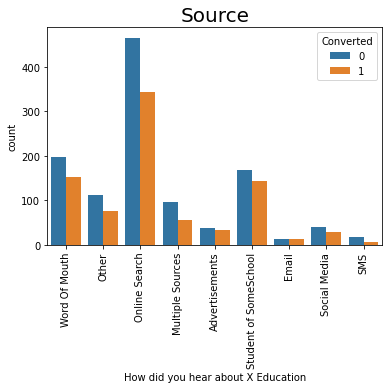

In [15]:
#Analysing the source column before dropping

sns.countplot(x= lead['How did you hear about X Education'], data= lead, hue= lead['Converted'])
plt.title('Source', fontsize= 20)
plt.xticks(rotation = 90)
plt.show()

#### Inference:
- From the graph above, we can see that highest number of customers have heard about X Education from online research.

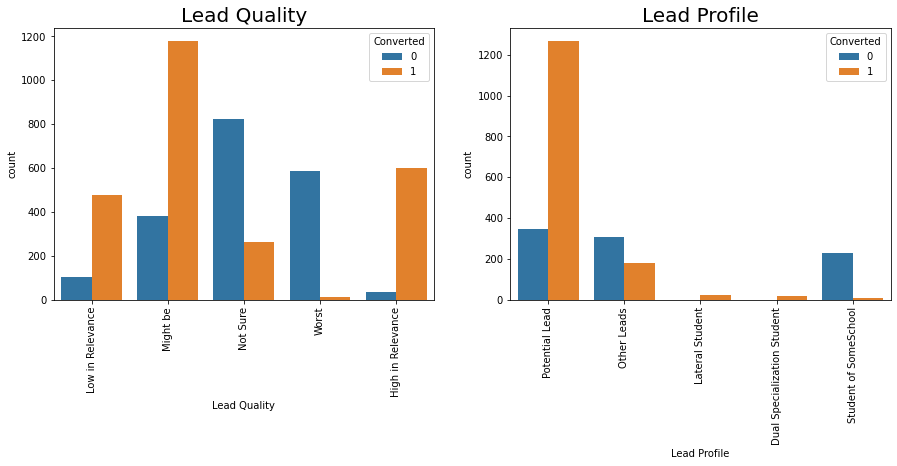

In [16]:
#Analysing the column 'Lead Quality' and 'Lead Profile' before dropping them

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x= lead['Lead Quality'], data= lead, hue= lead['Converted'])
plt.title('Lead Quality', fontsize= 20)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x= lead['Lead Profile'], data= lead, hue= lead['Converted'])
plt.title('Lead Profile', fontsize= 20)
plt.xticks(rotation = 90)

plt.show()

#### Inference:
- From the first graph, we can see that Lead Quality 'Might Be' has the highest number of customers converted into hot leads, while 'Not Sure' has the highest number of customers converted into cold leads.
- From the second graph, we can see that Lead Profile 'Potential Lead' has the highest number of customers converted into hot leads, while 'Potential Lead' and 'Other Leads' have similar number of customers converted into cold leads.

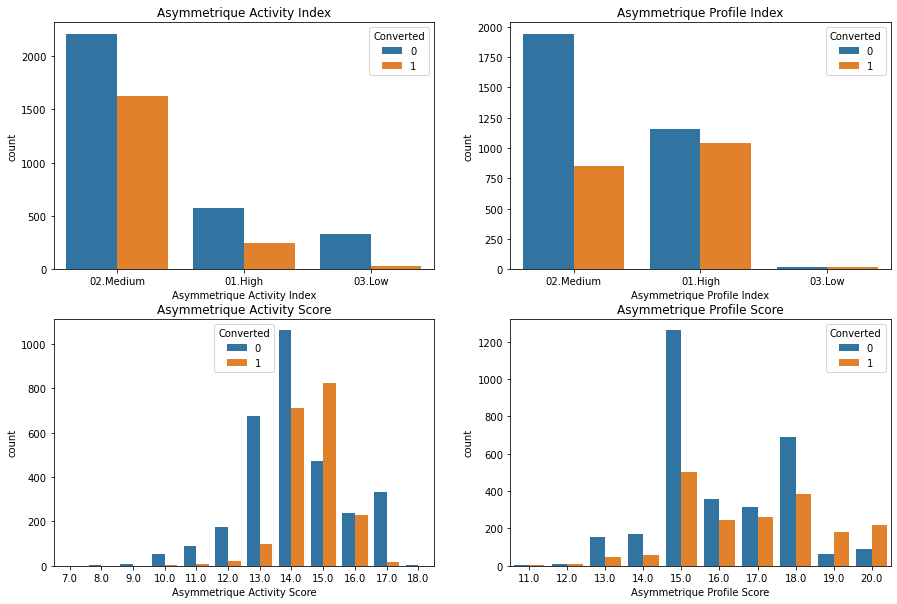

In [17]:
#Analysing the score and index columns before dropping them

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Asymmetrique Activity Index')
sns.countplot(x= lead['Asymmetrique Activity Index'], data= lead, hue= lead['Converted'])

plt.subplot(2,2,2)
plt.title('Asymmetrique Profile Index')
sns.countplot(x= lead['Asymmetrique Profile Index'], data= lead, hue= lead['Converted'])

plt.subplot(2,2,3)
plt.title('Asymmetrique Activity Score')
sns.countplot(x= lead['Asymmetrique Activity Score'], data= lead, hue= lead['Converted'])

plt.subplot(2,2,4)
plt.title('Asymmetrique Profile Score')
sns.countplot(x= lead['Asymmetrique Profile Score'], data= lead, hue= lead['Converted'])

plt.show()

#### Inference:
- From the first graph, it is evident that customers with medium Asymmetrique Activity Index are most in count.
- From the second graph, it is evident that customers with medium Asymmetrique Profile Index are converted into cold leads the most, while customers with high Asymmetrique Profile Index are converted into hot leads the most.
- From the third graph, it is evident that customers with Asymmetrique Activity Score of 15.0 are converted into hot leads the most, while customers with Asymmetrique Activity Score of 14.0 are converted into cold leads the most.
- From the fourth graph, it is evident that customers with Asymmetrique Profile Score of 15.0 are converted into both hot and cold leads the most.

In [18]:
lead.drop(dropping[dropping > 40].index,axis=1,inplace=True)

In [19]:
# to check if the columns are dropped
lead.shape

(9240, 28)

### Data Distribution of Categorical Columns 

In [20]:
#checking data types 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [21]:
#checking all the object columns
lead.columns.values

array(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype=object)

In [22]:
#making new dataframe with columns 8 to 28 of the original dataframe, lead
data = lead.iloc[:, 8:28]
data.head()

,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [23]:
#Printing the normalisation for the column data to check skewdness of data
for x in data:
    #print(lead[x])
    y = lead[x]
    z = y.value_counts(normalize=True) * 100
    print(z)
    print("----------------------------------------------------")

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64
----------------------------------------------------
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.

### Imbalance Percentage of categorical columns

In [24]:
#Checking the Imbalance Percentage of lead origin column
lead["Lead Origin"].value_counts(normalize=True) *100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [25]:
#Checking the Imbalance Percentage of lead source column
lead["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
NC_EDM                0.010865
WeLearn               0.010865
blog                  0.010865
youtubechannel        0.010865
testone               0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64

In [26]:
#Checking the Imbalance Percentage of do not email column
lead["Do Not Email"].value_counts(normalize=True) * 100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [27]:
#Checking the Imbalance Percentage of do not call column
lead["Do Not Call"].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

##### Drop the columns that are highly skewed

- Country
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
- Do Not Call

In [28]:
#dropping the skewed columns

columns_drop = ["Country","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums",
                "Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
                "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                "Do Not Call"]

lead.drop(columns_drop,axis=1,inplace=True)

In [29]:
#to make sure the columns were dropped
lead.shape

(9240, 14)

#### Merging observations in categorical columns
We will group the observations in the following columns so that they become reasonably balanced

- Specialization
- What is your current occupation
- City 
- Lead Source
- Lead Origin
- Do Not Call
- Do Not Email

#### Specialization

In [30]:
lead["Specialization"].value_counts(normalize=True) * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [31]:
lead["Specialization"] = lead["Specialization"].replace(["Business Administration","Banking, Investment And Insurance",
                                                        "Media and Advertising","Travel and Tourism","International Business","E-COMMERCE",
                                                        "Rural and Agribusiness","E-Business","Services Excellence"],"Other Specializations")
lead["Specialization"] = lead["Specialization"].replace(["Operations Management","IT Projects Management","Supply Chain Management",
                                                         "Healthcare Management","Hospitality Management","Retail Management"],"Other Managements")

In [32]:
lead.Specialization.value_counts(normalize=True)*100

Other Specializations        27.423208
Other Managements            27.150171
Finance Management           16.655290
Human Resource Management    14.470990
Marketing Management         14.300341
Name: Specialization, dtype: float64

#### What is your current occupation

In [33]:
lead["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [34]:
lead["What is your current occupation"] = lead["What is your current occupation"].replace(['Student','Other','Housewife','Businessman','Working Professional'],"Other Occupations")

In [35]:
lead["What is your current occupation"].value_counts(normalize=True)*100

Unemployed           85.496183
Other Occupations    14.503817
Name: What is your current occupation, dtype: float64

#### City

In [36]:
lead['City'].value_counts(normalize=True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [37]:
lead['City'] = lead['City'].replace(["Thane & Outskirts","Other Cities","Other Cities of Maharashtra","Other Metro Cities","Tier II Cities"],"Other Cities")

In [38]:
lead["City"].value_counts(normalize=True)*100

Mumbai          57.835218
Other Cities    42.164782
Name: City, dtype: float64

#### Lead Source

In [39]:
lead["Lead Source"].value_counts(normalize=True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
NC_EDM                0.010865
WeLearn               0.010865
blog                  0.010865
youtubechannel        0.010865
testone               0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64

In [40]:
lead["Lead Source"] = lead["Lead Source"].replace(["Reference","Welingak Website","Referral Sites","Facebook","bing",
                                                  "google","Click2call","Live Chat","Social Media","Press_Release","NC_EDM",
                                                  "Pay per Click Ads","WeLearn","welearnblog_Home","blog","youtubechannel","testone"],"Other Sources")

In [41]:
lead["Lead Source"].value_counts(normalize=True) * 100

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Other Sources      9.604520
Name: Lead Source, dtype: float64

#### Lead Origin

In [42]:
lead["Lead Origin"].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [43]:
lead["Lead Origin"] = lead["Lead Origin"].replace(["API","Lead Add Form","Lead Import","Quick Add Form"],"Other Origins")

In [44]:
lead["Lead Origin"].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
Other Origins              47.121212
Name: Lead Origin, dtype: float64

#### Do Not Call

In [45]:
lead["Do Not Email"].value_counts(normalize=True) * 100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

"Do Not Email" column is highly skewed, therefore we will drop

In [46]:
lead.drop("Do Not Email",axis=1,inplace=True)

In [47]:
lead.shape

(9240, 13)

Drop the column Last Activity, Tags, Last Notable Activity as they are sales team data

In [48]:
# Dropping the Last Activity, Tags, Last Notable Activity columns

lead.drop(["Last Activity","Tags","Last Notable Activity"],axis=1,inplace=True)

Checking missing values more than 40% in rows

In [49]:
# checking the row null

row_null = lead.isnull().sum(axis=1).sort_values(ascending=False)
drop = (row_null[row_null > 0] / 11)*100
dropping_rows = drop[drop > 40]
dropping_rows

7302    45.454545
7847    45.454545
680     45.454545
5840    45.454545
4605    45.454545
836     45.454545
3928    45.454545
dtype: float64

In [50]:
#dropping those rows
lead.drop(dropping_rows.index,axis=0,inplace=True)

### Checking Outliers

In [51]:
#outliers check
round(lead.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.00,9103.00,9233.00,9103.00
mean,0.39,3.45,487.69,2.36
std,0.49,4.85,548.09,2.16
min,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00
35%,0.00,2.00,98.00,1.50
50%,0.00,3.00,248.00,2.00
55%,0.00,3.00,305.00,2.00
75%,1.00,5.00,936.00,3.00
95%,1.00,10.00,1562.00,6.00


<AxesSubplot:ylabel='TotalVisits'>

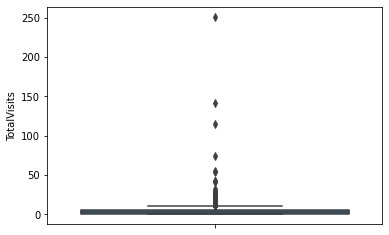

In [52]:
#checking outliers for total visits column
sns.boxplot(data=lead,y = "TotalVisits",orient='v')

<AxesSubplot:ylabel='Page Views Per Visit'>

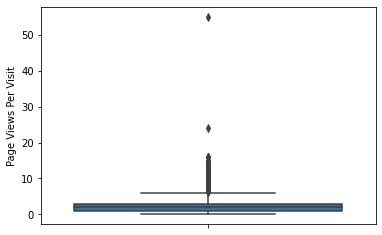

In [53]:
#checking outliers for page views per visits column
sns.boxplot(data=lead,y = "Page Views Per Visit",orient='v')

### Imputing Missing Values

In [54]:
#checking the data types
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9233 non-null   object 
 1   Lead Source                             9203 non-null   object 
 2   Converted                               9233 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9233 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Specialization                          5860 non-null   object 
 7   What is your current occupation         6544 non-null   object 
 8   City                                    5571 non-null   object 
 9   A free copy of Mastering The Interview  9233 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 793.5+ KB


In [55]:
#checking null values
lead.isnull().sum().sort_values(ascending=False)

City                                      3662
Specialization                            3373
What is your current occupation           2689
Page Views Per Visit                       130
TotalVisits                                130
Lead Source                                 30
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Lead Origin                                  0
dtype: int64

In [56]:
# treating Lead Source
lead["Lead Source"].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1754
Organic Search    1154
Other Sources      884
Name: Lead Source, dtype: int64

In [57]:
#imputing missing values with mode
lead["Lead Source"] = lead["Lead Source"].fillna("Google")

In [58]:
#rechecking
lead["Lead Source"].value_counts()

Google            2898
Direct Traffic    2543
Olark Chat        1754
Organic Search    1154
Other Sources      884
Name: Lead Source, dtype: int64

In [59]:
# treating TotalVisits
lead["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [60]:
#imputing missing values with median
lead["TotalVisits"] = lead["TotalVisits"].fillna(lead["TotalVisits"].median())

In [61]:
# treating Page Views Per Visit with median
lead["Page Views Per Visit"] = lead["Page Views Per Visit"].fillna(lead["Page Views Per Visit"].median())

In [62]:
# treating City
lead["City"].value_counts()

Mumbai          3222
Other Cities    2349
Name: City, dtype: int64

In [63]:
#imputing missing values with mode
lead["City"] = lead["City"].fillna("Mumbai")

In [64]:
# treating Specialization
lead["Specialization"].value_counts()

Other Specializations        1607
Other Managements            1591
Finance Management            976
Human Resource Management     848
Marketing Management          838
Name: Specialization, dtype: int64

In [65]:
#imputing missing values with mode
lead["Specialization"] = lead["Specialization"].fillna("Other Specializations")

In [66]:
# treating What is your current occupation
lead["What is your current occupation"].value_counts()

Unemployed           5594
Other Occupations     950
Name: What is your current occupation, dtype: int64

In [67]:
#imputing missing values with mode
lead["What is your current occupation"] = lead["What is your current occupation"].fillna("Unemployed")

In [68]:
#rechecking the final shape
lead.shape

(9233, 10)

In [69]:
#rechecking unique observations in each column
lead.nunique().sort_values()

Lead Origin                                  2
Converted                                    2
What is your current occupation              2
City                                         2
A free copy of Mastering The Interview       2
Lead Source                                  5
Specialization                               5
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1731
dtype: int64

### Rows retained

In [70]:
# rows_retained = (Rows after cleaning/ total number of rows) * 100
rows_retained = (9233/9240) * 100
rows_retained

99.92424242424242

Therefore, after the cleaning of data, 99.92% rows were retained.

## Step 3: Exploratory Data Analysis (EDA)

In [71]:
#checking the data types 
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9233 non-null   object 
 1   Lead Source                             9233 non-null   object 
 2   Converted                               9233 non-null   int64  
 3   TotalVisits                             9233 non-null   float64
 4   Total Time Spent on Website             9233 non-null   int64  
 5   Page Views Per Visit                    9233 non-null   float64
 6   Specialization                          9233 non-null   object 
 7   What is your current occupation         9233 non-null   object 
 8   City                                    9233 non-null   object 
 9   A free copy of Mastering The Interview  9233 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 793.5+ KB


In [72]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,Other Origins,Olark Chat,0,0.0,0,0.0,Other Specializations,Unemployed,Mumbai,No
1,Other Origins,Organic Search,0,5.0,674,2.5,Other Specializations,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other Specializations,Other Occupations,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Specializations,Unemployed,Mumbai,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Other Specializations,Unemployed,Mumbai,No


### Target Variable

In [73]:
#checking imbalance percentage of target variable
lead.Converted.value_counts(normalize=True)*100

0    61.453482
1    38.546518
Name: Converted, dtype: float64

Text(0.5, 1.0, 'Converted')

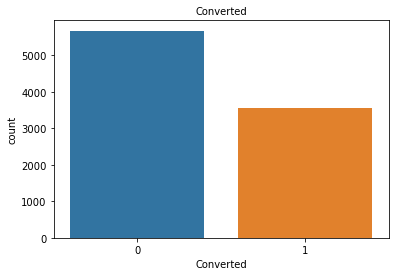

In [74]:
#countplot of the target variable
sns.countplot(x= lead['Converted'], data= lead)
plt.title('Converted', fontsize= 10)

### Inference:
- The count of customers who have converted into cold leads is more than that of the ones converted into hot leads. 
- The conversion rate of leads is 38.53%.

### Continuous Variables

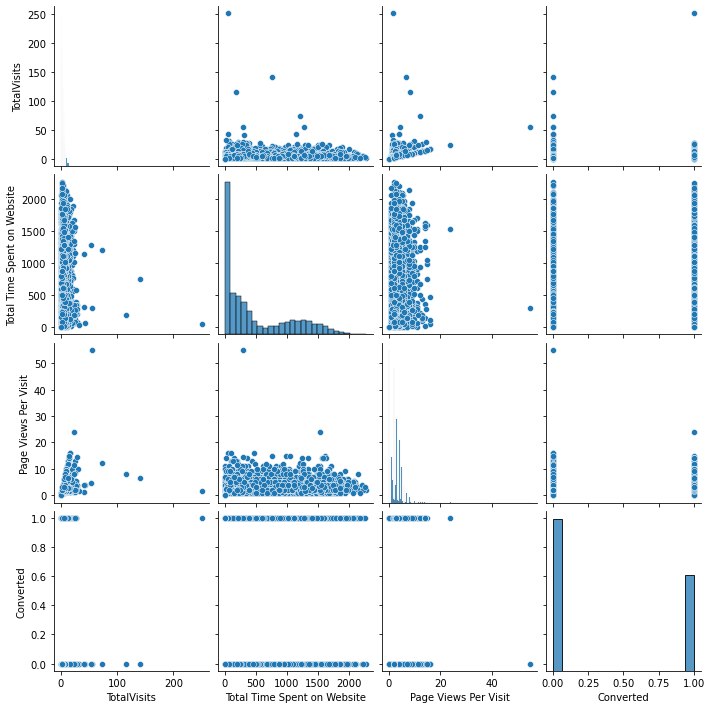

In [75]:
#visualizing continuous variables
sns.pairplot(lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']])
plt.show()

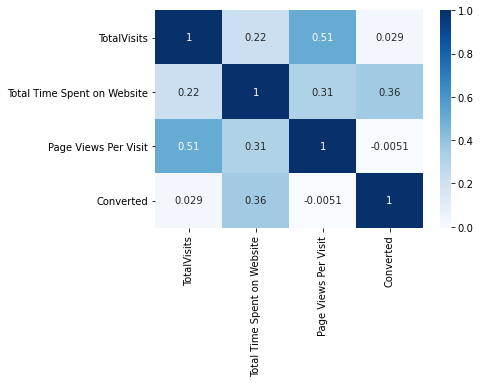

In [76]:
#heatmap

sns.heatmap(lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']].corr(), cmap="Blues", annot = True)
plt.show()

#### Inference:
- From the graphs above, we can see that the target variable, 'Converted', has the strongest positive correlation with 'Total Time Spent on Website'.
- 'Page Views Per Visit' has a negative correlation with the target variable.
- 'Page Views Per Visit' and 'TotalVisits' have a strong correlation with each other. 

### Categorical Variables

#### Binary Variables

- Lead Origin                                                                   
- What is your current occupation              
- City                                         
- A free copy of Mastering The Interview 

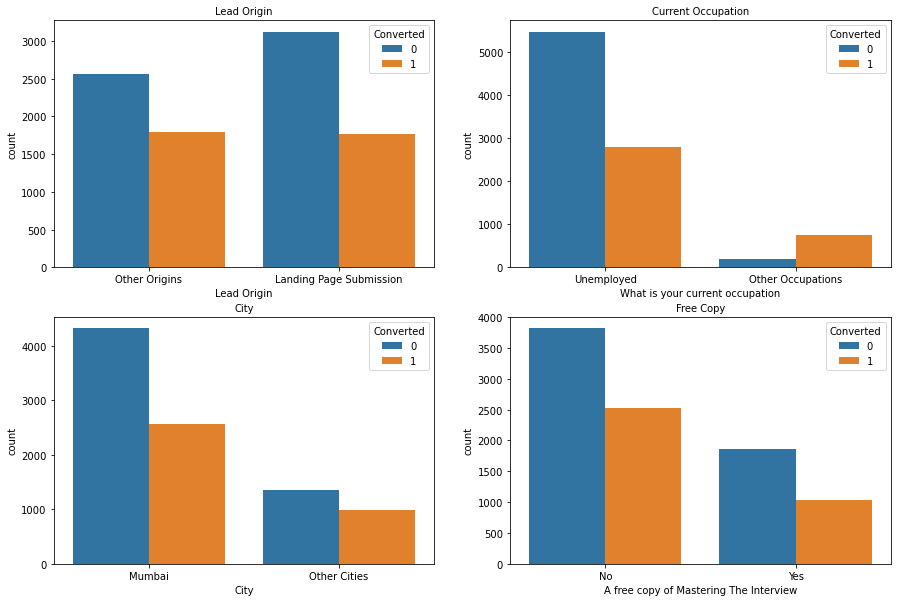

In [77]:
#countplots of other binary variables
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x= lead['Lead Origin'], data= lead, hue= lead['Converted'])
plt.title('Lead Origin', fontsize= 10)

plt.subplot(2,2,2)
sns.countplot(x= lead['What is your current occupation'], data= lead, hue= lead['Converted'])
plt.title('Current Occupation', fontsize= 10)

plt.subplot(2,2,3)
sns.countplot(x= lead['City'], data= lead, hue= lead['Converted'])
plt.title('City', fontsize= 10)

plt.subplot(2,2,4)
sns.countplot(x= lead['A free copy of Mastering The Interview'], data= lead, hue= lead['Converted'])
plt.title('Free Copy', fontsize= 10)

plt.show()

#### Inference:
- From the first graph, it is evident that higher number of customers originated from 'landing page submissions' have converted into cold leads more. 
- From the second graph, it is evident that higher number of customers are unemployed.
- From the third graph, it is evident that higher number of customers belong to the city Mumbai.
- From the fourth graph, it is evident that higher number of customers do not want a free copy of Mastering The Interview.

#### Categorical Variables

- Lead Source                                  
- Specialization  

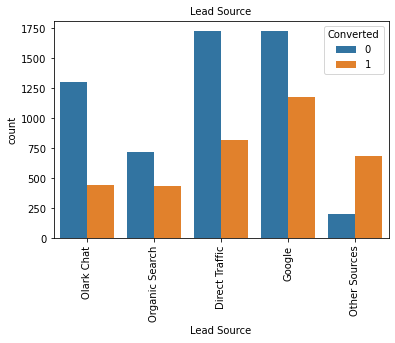

In [78]:
#visualizing Lead Source column

sns.countplot(x= lead['Lead Source'], data= lead, hue= lead['Converted'])
plt.title('Lead Source', fontsize= 10)
plt.xticks(rotation = 90)

plt.show()

#### Inference:
- The conversion rate of customers into hot leads is most when the source of the lead is Google.
- The conversion rate of customers into cold leads is similar when the source of the lead is Google and Direct Traffic.

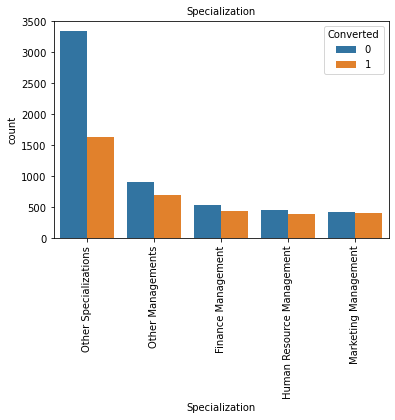

In [79]:
#visualizing Specialization column

sns.countplot(x= lead['Specialization'], data= lead, hue= lead['Converted'])
plt.title('Specialization', fontsize= 10)
plt.xticks(rotation = 90)

plt.show()

#### Inference:
- Highest number of customers have done other specializations and this category has a higher cold lead conversion rate.

## Step 4: Data Preparation

### Creating Dummy Variables

In [80]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9233 non-null   object 
 1   Lead Source                             9233 non-null   object 
 2   Converted                               9233 non-null   int64  
 3   TotalVisits                             9233 non-null   float64
 4   Total Time Spent on Website             9233 non-null   int64  
 5   Page Views Per Visit                    9233 non-null   float64
 6   Specialization                          9233 non-null   object 
 7   What is your current occupation         9233 non-null   object 
 8   City                                    9233 non-null   object 
 9   A free copy of Mastering The Interview  9233 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [81]:
#creating dummies for categorical variables: Lead Source and Specialization
source= pd.get_dummies(lead['Lead Source'], drop_first=True)
special= pd.get_dummies(lead['Specialization'], drop_first=True)
Origin= pd.get_dummies(lead['Lead Origin'], drop_first=True)
occupation= pd.get_dummies(lead['What is your current occupation'], drop_first=True)
city= pd.get_dummies(lead['City'])

In [82]:
lead['A free copy of Mastering The Interview']  = lead['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

The first column of all the dummy variables has been dropped since, we do not need all the columns to identify source and specialization.

In [83]:
source.head()

,Google,Olark Chat,Organic Search,Other Sources
0,0,1,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0


In [84]:
special.head()

,Human Resource Management,Marketing Management,Other Managements,Other Specializations
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [85]:
Origin.head()

,Other Origins
0,1
1,1
2,0
3,0
4,0


In [86]:
occupation.head()

,Unemployed
0,1
1,1
2,0
3,1
4,1


In [87]:
city.head()

,Mumbai,Other Cities
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [88]:
#Adding the dummy variables (source and special) to the original dataframe
lead= pd.concat([source, special, Origin, occupation, lead],axis=1)
lead.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,0,1,0,0,0,0,0,1,1,1,Other Origins,Olark Chat,0,0.0,0,0.0,Other Specializations,Unemployed,Mumbai,0
1,0,0,1,0,0,0,0,1,1,1,Other Origins,Organic Search,0,5.0,674,2.5,Other Specializations,Unemployed,Mumbai,0
2,0,0,0,0,0,0,0,1,0,0,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other Specializations,Other Occupations,Mumbai,1
3,0,0,0,0,0,0,0,1,0,1,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Specializations,Unemployed,Mumbai,0
4,1,0,0,0,0,0,0,1,0,1,Landing Page Submission,Google,1,2.0,1428,1.0,Other Specializations,Unemployed,Mumbai,0


In [89]:
#Removing the original columns (Lead Source and Specialization) from the original dataframe
lead.drop(['Lead Source', 'Specialization', 'Lead Origin', 'What is your current occupation', 'City'], axis = 1, inplace = True)
lead.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,1,0,0,0,0,0,1,1,1,0,0.0,0,0.0,0
1,0,0,1,0,0,0,0,1,1,1,0,5.0,674,2.5,0
2,0,0,0,0,0,0,0,1,0,0,1,2.0,1532,2.0,1
3,0,0,0,0,0,0,0,1,0,1,0,1.0,305,1.0,0
4,1,0,0,0,0,0,0,1,0,1,1,2.0,1428,1.0,0


In [90]:
#checking the shape of the updated dataframe
lead.shape

(9233, 15)

### Test-Train Split

In [91]:
#importing the libraries
from sklearn.model_selection import train_test_split

In [92]:
#adding the target variable in y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
#dropping target variable from X
X=lead.drop('Converted', axis=1)
X.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,1,0,0,0,0,0,1,1,1,0.0,0,0.0,0
1,0,0,1,0,0,0,0,1,1,1,5.0,674,2.5,0
2,0,0,0,0,0,0,0,1,0,0,2.0,1532,2.0,1
3,0,0,0,0,0,0,0,1,0,1,1.0,305,1.0,0
4,1,0,0,0,0,0,0,1,0,1,2.0,1428,1.0,0


In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=101)

### Scaling Features

In [95]:
#importing libraries
from sklearn.preprocessing import MinMaxScaler

In [96]:
#instantiating the object
scaler = MinMaxScaler()

In [97]:
#making a list of numeric variables
num_variables= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [98]:
#applying scalar() to all the numeric variables
X_train[num_variables] = scaler.fit_transform(X_train[num_variables])
X_train.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
7873,0,1,0,0,0,0,0,1,1,1,0.000000,0.000000,0.000000,0
2622,0,0,0,0,0,0,1,0,0,0,0.007968,0.500880,0.036364,1
8060,0,0,0,1,0,0,1,0,1,0,0.000000,0.000000,0.000000,0
2797,0,0,0,1,0,0,0,1,1,1,0.000000,0.000000,0.000000,0
1634,0,0,0,1,0,0,0,0,1,1,0.011952,0.127201,0.036364,0


In [99]:
X_train.describe()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000,7386.000000
mean,0.312483,0.187788,0.126049,0.095180,0.092608,0.089764,0.173978,0.538857,0.466829,0.900623,0.013761,0.215989,0.042915,0.314785
std,0.463537,0.390569,0.331927,0.293483,0.289901,0.285863,0.379116,0.498522,0.498932,0.299188,0.019635,0.241358,0.039103,0.464462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003984,0.006162,0.018182,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.011952,0.110255,0.036364,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.019920,0.416813,0.054545,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
y_train.head()

7873    0
2622    1
8060    1
2797    1
1634    0
Name: Converted, dtype: int64

In [101]:
# Checking the Conversion Rate
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

38.54651792483483

The conversion rate is 38.54%

## Step 5: Building the Model

### Logistic Regression Building Model

In [102]:
# import the required library

import statsmodels.api as sm

### Initial Model 

In [103]:
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3787.9
Date:                Mon, 14 Jun 2021   Deviance:                       7575.8
Time:                        19:53:44   Pearson chi2:                 7.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1224      0.160     -0.763      0.445      -0.437       0.192
Google                                     0.4098      0.094      4.339      0.000       0.225       0.595
Olark Chat                                 0.7171      0.128      5.585      0.000       0.465       0.969
Organic Search                             0.3864      0.106      3.635      0.000       0.178       0.595
Other Sources                              2.5409      0.141     17.957      0.000       2.264       2.818
Human Resource Management                 -0.0434      0.127     -0.343      0.732      -0.291       0.205
Marketing Management                       0.0336      0.128      0.262      0.794      -0.218       0.285
Other Managements                         -0.0517      0.111     -0.466      0.641      -0.269       0.166
Other Specializations                     -0.5323      0.104     -5.127      0.000      -0.736      -0.329
Other Origins                              0.2859      0.094      3.037      0.002       0.101       0.470
Unemployed                                -1.7496      0.105    -16.730      0.000      -1.955      -1.545
TotalVisits                                3.3331      1.661      2.007      0.045       0.078       6.588
Total Time Spent on Website                4.3267      0.140     30.925      0.000       4.052       4.601
Page Views Per Visit                      -4.7427      1.076     -4.407      0.000      -6.852      -2.633
A free copy of Mastering The Interview     0.0069      0.089      0.078      0.938      -0.167       0.181
==========================================================================================================
"""

We have many variables with p-value >0.5

### Using mixed modelling approach 

- RFE
- Manual Selection

In [104]:
# RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,10)
rfe = rfe.fit(X_train,y_train)

In [105]:
rfe.support_

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False])

In [106]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('Google', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', True, 1),
 ('Other Sources', True, 1),
 ('Human Resource Management', False, 3),
 ('Marketing Management', False, 4),
 ('Other Managements', False, 2),
 ('Other Specializations', True, 1),
 ('Other Origins', True, 1),
 ('Unemployed', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 5)]

In [107]:
col = X_train.columns[rfe.support_]

In [108]:
col

Index(['Google', 'Olark Chat', 'Organic Search', 'Other Sources',
       'Other Specializations', 'Other Origins', 'Unemployed', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['Human Resource Management', 'Marketing Management',
       'Other Managements', 'A free copy of Mastering The Interview'],
      dtype='object')

### Model building after RFE

### Model 1

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3788.2
Date:                Mon, 14 Jun 2021   Deviance:                       7576.5
Time:                        19:53:44   Pearson chi2:                 7.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [111]:
X_train.shape

(7386, 14)

#### Checking VIF

In [112]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
6,Unemployed,5.03
5,Other Origins,4.74
9,Page Views Per Visit,3.81
1,Olark Chat,3.09
4,Other Specializations,3.05
0,Google,2.39
8,Total Time Spent on Website,2.02
7,TotalVisits,2.00
3,Other Sources,1.86
2,Organic Search,1.69


### Model 2 

- vif is high for the Unemployed
- Preference is first on the p-value

In [114]:
col = col.drop("Unemployed",1)

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3948.2
Date:                Mon, 14 Jun 2021   Deviance:                       7896.5
Time:                        19:53:45   Pearson chi2:                 7.72e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Other Origins,4.73
8,Page Views Per Visit,3.25
4,Other Specializations,2.80
1,Olark Chat,2.70
0,Google,2.23
6,TotalVisits,1.99
7,Total Time Spent on Website,1.91
3,Other Sources,1.79
2,Organic Search,1.68


### Model 3

- Drop "TotalVisits" due to its high p-value

In [117]:
col = col.drop("TotalVisits")

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3950.0
Date:                Mon, 14 Jun 2021   Deviance:                       7900.1
Time:                        19:53:45   Pearson chi2:                 7.71e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Other Origins,4.73
4,Other Specializations,2.80
1,Olark Chat,2.70
7,Page Views Per Visit,2.55
0,Google,2.22
6,Total Time Spent on Website,1.90
3,Other Sources,1.79
2,Organic Search,1.67


### Model 4

- drop "Other Origins" due to high VIF

In [120]:
col = col.drop("Other Origins")

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3955.9
Date:                Mon, 14 Jun 2021   Deviance:                       7911.8
Time:                        19:53:45   Pearson chi2:                 7.71e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
6,Page Views Per Visit,2.41
4,Other Specializations,2.34
5,Total Time Spent on Website,1.89
0,Google,1.83
1,Olark Chat,1.65
2,Organic Search,1.52
3,Other Sources,1.15


### Model 5

- drop "Page Views Per Visit" due to high negative coefficient

In [123]:
col = col.drop("Page Views Per Visit")

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7386
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3970.6
Date:                Mon, 14 Jun 2021   Deviance:                       7941.3
Time:                        19:53:45   Pearson chi2:                 7.77e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Other Specializations,2.30
1,Olark Chat,1.64
0,Google,1.61
5,Total Time Spent on Website,1.58
2,Organic Search,1.29
3,Other Sources,1.15


### Predictions on Training Set

In [126]:
#getting predictions on training set using the final model

X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7873    0.216483
2622    0.573787
8060    0.758022
2797    0.651296
1634    0.844127
6058    0.200570
325     0.214013
1943    0.696262
240     0.242550
453     0.707359
dtype: float64

In [127]:
#making a new datafram with predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
7873,0,0.216483,7873
2622,1,0.573787,2622
8060,1,0.758022,8060
2797,1,0.651296,2797
1634,0,0.844127,1634


- The cut-off chosen for the predictions is 0.5.
- Any customer having Converted_prob more than 0.5 will be marked as 1 which means he/she is a hot lead.
- Otherwise, the customer will be marked 0 which means he/she is a cold lead.

In [128]:
#applying the cut-off

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
7873,0,0.216483,7873,0
2622,1,0.573787,2622,1
8060,1,0.758022,8060,1
2797,1,0.651296,2797,1
1634,0,0.844127,1634,1


## Step 6: Evaluation Metrics for the Training Set

In [129]:
#importing the libraries
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3709  832]
 [ 889 1956]]


In [131]:
# checking the overall accuracy.
Accuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
Accuracy

0.7669916057405903

#### calculating other metrics

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
#calculating other metrics
Sensitivity = TP / float(TP+FN) 
Specificity = TN / float(TN+FP) 
FPR = (FP/ float(TN+FP))    #false positive rate    
PPV = (TP / float(TP+FP))   #positive predictive value
NPV = (TN / float(TN+ FN))  #negative predictive value

In [134]:
#printing all metrics 
print ('Accuracy    = ', round (Accuracy,2))
print ('Sensitivity = ', round (Sensitivity,2))
print ('Specificity = ', round (Specificity,2))
print ('FPR         = ', round (FPR,2))
print ('PPV         = ', round (PPV,2))
print ('NPV         = ', round (NPV,2))

Accuracy    =  0.77
Sensitivity =  0.69
Specificity =  0.82
FPR         =  0.18
PPV         =  0.7
NPV         =  0.81


## Step 7: Plotting ROC Curve

In [135]:
#defining a function for plotting ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted)

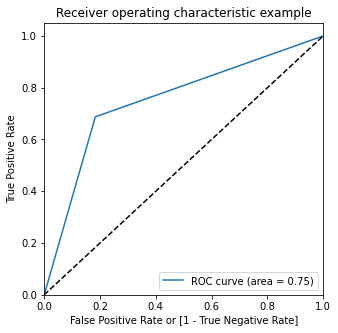

In [137]:
#applying the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#### Inference:
- The ROC gives a good knowledge of the model
- It is visible that the curve is kind of hugging the y-axis (True Positive Rate )

## Step 8: Finding the Optimal cut-off

In [138]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7873,0,0.216483,7873,0,1,1,1,0,0,0,0,0,0,0
2622,1,0.573787,2622,1,1,1,1,1,1,1,0,0,0,0
8060,1,0.758022,8060,1,1,1,1,1,1,1,1,1,0,0
2797,1,0.651296,2797,1,1,1,1,1,1,1,1,0,0,0
1634,0,0.844127,1634,1,1,1,1,1,1,1,1,1,1,0


In [139]:
#calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385188     1.000000     0.000000
0.1          0.1  0.398050     0.995431     0.023783
0.2          0.2  0.551313     0.918453     0.321295
0.3          0.3  0.752505     0.759578     0.748073
0.4          0.4  0.766992     0.687522     0.816780
0.5          0.5  0.756973     0.607030     0.850914
0.6          0.6  0.734498     0.501933     0.880203
0.7          0.7  0.690766     0.302988     0.933715
0.8          0.8  0.640265     0.108963     0.973134
0.9          0.9  0.627403     0.043234     0.993394


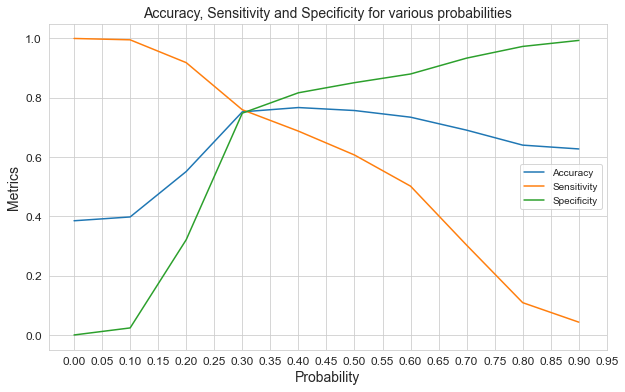

In [140]:
# plotting accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

- Since the lines intersect at 0.3, it is the optimal cut-off.

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7873,0,0.216483,7873,0,1,1,1,0,0,0,0,0,0,0,0
2622,1,0.573787,2622,1,1,1,1,1,1,1,0,0,0,0,1
8060,1,0.758022,8060,1,1,1,1,1,1,1,1,1,0,0,1
2797,1,0.651296,2797,1,1,1,1,1,1,1,1,0,0,0,1
1634,0,0.844127,1634,1,1,1,1,1,1,1,1,1,1,0,1


### Assigning Lead Score

In [142]:
#assigning a lead score to all customers
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
7873,0,0.216483,7873,0,1,1,1,0,0,0,0,0,0,0,0,22
2622,1,0.573787,2622,1,1,1,1,1,1,1,0,0,0,0,1,57
8060,1,0.758022,8060,1,1,1,1,1,1,1,1,1,0,0,1,76
2797,1,0.651296,2797,1,1,1,1,1,1,1,1,0,0,0,1,65
1634,0,0.844127,1634,1,1,1,1,1,1,1,1,1,1,0,1,84


### Rechecking the Matrics

In [143]:
#checking accuracy
Accuracy1= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
Accuracy1

0.752504738694828

In [144]:
#new confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3397, 1144],
       [ 684, 2161]], dtype=int64)

In [145]:
TPO = confusion2[1,1] # new true positive 
TNO = confusion2[0,0] # new true negatives
FPO = confusion2[0,1] # new false positives
FNO = confusion2[1,0] # new false negatives

In [146]:
#checking other matrics
Sensitivity1 = TPO / float(TPO+FNO) 
Specificity1 = TNO / float(TNO+FPO) 
FPR1 = (FPO/ float(TNO+FPO))    #false positive rate    
PPV1 = (TPO/ float(TPO+FPO))   #positive predictive value
NPV1 = (TNO/ float(TNO+ FNO))  #negative predictive value

In [147]:
print ('Accuracy    = ', round (Accuracy1,2))
print ('Sensitivity = ', round (Sensitivity1,2))
print ('Specificity = ', round (Specificity1,2))
print ('FPR         = ', round (FPR1,2))
print ('PPV         = ', round (PPV1,2))
print ('NPV         = ', round (NPV1,2))

Accuracy    =  0.75
Sensitivity =  0.76
Specificity =  0.75
FPR         =  0.25
PPV         =  0.65
NPV         =  0.83


## Step 9: Precision and Recall

In [148]:
#calculating precision and recall
Precision= TPO / float(TPO+FPO)
Recall= TNO / float(TN+FPO)

In [149]:
#printing precision and recall
print ('Precision = ', round (Precision,2))
print ('Recall    = ', round (Recall,2))

Precision =  0.65
Recall    =  0.7


### Precision and Recall Score

In [150]:
#importing libraries
from sklearn.metrics import precision_score, recall_score

In [151]:
#calculating precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7015781922525107

In [152]:
#calculating recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6875219683655536

### Precision and Recall Trade-off

In [153]:
#importing libraries
from sklearn.metrics import precision_recall_curve

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

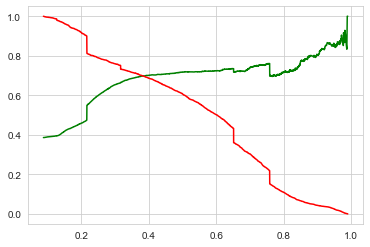

In [155]:
#plotting the precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 10: Testing the Model on Test Set

In [156]:
X_test.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
3378,0,0,0,0,0,0,0,0,0,0,2.0,298,2.00,1
200,0,0,1,0,0,0,0,1,1,0,5.0,1234,1.67,0
2326,0,0,0,0,0,0,1,0,0,1,4.0,1882,2.00,1
7369,0,0,0,0,0,0,0,1,0,1,2.0,141,2.00,0
2201,0,0,0,0,0,0,0,1,0,1,5.0,129,2.50,0


In [157]:
X_test.describe()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000
mean,0.319437,0.198701,0.120736,0.097997,0.088793,0.094748,0.165674,0.541419,0.486735,0.883054,3.378993,475.554954,2.347342,0.304819
std,0.466385,0.399130,0.325909,0.297391,0.284521,0.292946,0.371888,0.498416,0.499959,0.321443,4.364780,546.955439,2.130708,0.460455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,237.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,878.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,115.000000,2112.000000,15.000000,1.000000


In [158]:
# Scaling

X_test[["TotalVisits","Total Time Spent on Website","A free copy of Mastering The Interview"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","A free copy of Mastering The Interview"]])

In [159]:
X_test.head()

,Google,Olark Chat,Organic Search,Other Sources,Human Resource Management,Marketing Management,Other Managements,Other Specializations,Other Origins,Unemployed,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
3378,0,0,0,0,0,0,0,0,0,0,0.007968,0.131162,2.00,0.018182
200,0,0,1,0,0,0,0,1,1,0,0.019920,0.543134,1.67,0.000000
2326,0,0,0,0,0,0,1,0,0,1,0.015936,0.828345,2.00,0.018182
7369,0,0,0,0,0,0,0,1,0,1,0.007968,0.062060,2.00,0.000000
2201,0,0,0,0,0,0,0,1,0,1,0.019920,0.056778,2.50,0.000000


In [160]:
X_test = X_test[col]
X_test.head()

,Google,Olark Chat,Organic Search,Other Sources,Other Specializations,Total Time Spent on Website
3378,0,0,0,0,0,0.131162
200,0,0,1,0,1,0.543134
2326,0,0,0,0,0,0.828345
7369,0,0,0,0,1,0.062060
2201,0,0,0,0,1,0.056778


In [161]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Google,Olark Chat,Organic Search,Other Sources,Other Specializations,Total Time Spent on Website
3378,1.0,0,0,0,0,0,0.131162
200,1.0,0,0,1,0,1,0.543134
2326,1.0,0,0,0,0,0,0.828345
7369,1.0,0,0,0,0,1,0.062060
2201,1.0,0,0,0,0,1,0.056778


In [162]:
# making prediction on the test data set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3378    0.215225
200     0.577394
2326    0.846385
7369    0.108302
2201    0.106126
6999    0.651296
1270    0.316661
9039    0.572018
5143    0.214651
9178    0.104520
dtype: float64

In [163]:
#converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3378,0.215225
200,0.577394
2326,0.846385
7369,0.108302
2201,0.106126


In [164]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
#putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [166]:
#removing index for both dataframes to append them side by side 
y_pred_1.reset_index (drop=True, inplace=True)
y_test_df.reset_index (drop=True, inplace=True)

In [167]:
#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3378,0.215225
1,1,200,0.577394
2,1,2326,0.846385
3,0,7369,0.108302
4,0,2201,0.106126


In [168]:
#renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [169]:
#rearranging the dataframe
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Probability']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability
0,3378,0,0.215225
1,200,1,0.577394
2,2326,1,0.846385
3,7369,0,0.108302
4,2201,0,0.106126


In [170]:
#applying the cut-off
y_pred_final['final_predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,final_predicted
0,3378,0,0.215225,0
1,200,1,0.577394,1
2,2326,1,0.846385,1
3,7369,0,0.108302,0
4,2201,0,0.106126,0


In [171]:
#checking the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7547374120194911

In [172]:
#creating confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[847, 286],
       [167, 547]], dtype=int64)

In [173]:
TPT = confusion2[1,1] # true positive 
TNT = confusion2[0,0] # true negatives
FPT = confusion2[0,1] # false positives
FNT = confusion2[1,0] # false negatives

In [174]:
#other matrics
Sensitivity2= TPT / float(TPT+FNT)
Specificity2= TNT / float(TNT+FPT)

In [175]:
#printing the matrics
print ('Sensitivity = ', round (Sensitivity2,2))
print ('Specificity = ', round (Specificity2,2))

Sensitivity =  0.76
Specificity =  0.75
